# Aula 4: Tarefas

Nome completo: Nelson Aloysio Reis de Almeida Passos

#### Bibliotecas

In [23]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

#### Funções

In [2]:
def BrokeringCentrality(G, normalized=True):
    '''
    Computes Brokering Centrality for a graph G.
    For each node brokering centrality is defined as:
        brokering[node] =  (1 - clustering[node]) * degree[node]

    Parameters
    ----------
        G:  networkx graph
            Graph to be computed brokering centrality.

    Returns
    -------
        brokering: dictionary
                   Dictionary of nodes with brokering centrality as the value.
    '''
    Degree     = nx.degree_centrality(G)
    Clustering = nx.clustering(G)
    Brokering  = {}
    for node in G.nodes():
        Brokering[node] =  (1 - Clustering[node]) * Degree[node]
    #
    if normalized == True:
        NormalizeDict(Brokering)
    #
    return Brokering

In [3]:
def BridgenessCentrality(G, Betweenness=None, normalized=True):
    '''
    Computes Bridgeness Centrality for a graph G.

    For each node the bridgeness coefficient is defined as:
        bridge_coeff[node] =  (1/degree[node]) / sum(1/degree[neighbors[node]])

    The bridgeness centrality of a node is defined as:
        Bridgeness[node] = Betweenness(node) * bridge_coeff[node]

    Parameters
    ----------
        G:  networkx graph
            Graph to be computed brokering centrality.
        Betweenness:    dictionary
            Dictionary of nodes with betweenness centrality as value.

            Obs: since computing of betweennes can take a lot of time,
            it's possible to provide the betweenness as a parameter,
            if it was already computed before, to avoid compute it
            multiple times.

    Returns
    -------
        Bridgeness: dictionary
                    Dictionary of nodes with bridgeness centrality as value.

    Note: Only nodes with degree >= 1 will be returned.

    '''
    if Betweenness is None:
        Betweenness = nx.betweenness_centrality(G)
    #
    Bridgeness = {}
    for node in G.nodes():
        degree_node = nx.degree(G,node)
        if degree_node > 0:
            # sum(1/degree[neighbors[node]]
            neighbors_degree  = dict(nx.degree(G, nx.neighbors(G, node))).values()
            sum_neigh_inv_deg = sum((1.0/d) for d in neighbors_degree)
            #
            bridge_coeff = (1.0/degree_node) / sum_neigh_inv_deg
            #
            Bridgeness[node] = Betweenness[node] * bridge_coeff
    #
    if normalized == True:
        NormalizeDict(Bridgeness)
    #
    return Bridgeness

In [4]:
def NormalizeDict(D):
    '''
    Normalizes a dictionary of values.
    Finds the maximum value of a dictionary and divides all values by it.

    Parameters
    ----------
        D:  dictionary
            Dictionary of float numbers as values.

    Returns
    -------
        ND: dictionary
            Normalized (in-place) Dictionary with float number as value.
    '''
    max_d = max(D.values())
    for key in D:
        D[key] /= max_d

In [5]:
def ComputeCentralityMeasures(G, normalized=False):
    '''
    Computes centrality measures of a graph G.

    Parameters
    ----------
        G:  networkx graph
            Graph to be computed brokering centrality.
            G must be in one single component.

    Returns
    -------
        Centrality Measures Dictionaries:
            Degree, Betweenness, Closeness,
            Clustering, Brokering, Bridgeness
    '''
    #Degree      = nx.degree_centrality(G)                             #  0s
    Degree      = nx.degree(G)                                         #  0s
    Clustering  = nx.clustering(G)                                     #  4s
    Betweenness = nx.betweenness_centrality(G,normalized=normalized)   #  ~2750s
    Closeness   = nx.closeness_centrality(G)                           #  ~800s
    
    Brokering   = BrokeringCentrality(G,normalized=normalized)         #  ~8s
    Bridgeness  = BridgenessCentrality(G,Betweenness=Betweenness,normalized=normalized)
    #
    # replace code below to use normalize on Pandas
    if normalized == True:
        NormalizeDict(Degree)
        NormalizeDict(Betweenness)
        NormalizeDict(Closeness)
        NormalizeDict(Clustering)
        NormalizeDict(Brokering)
        NormalizeDict(Bridgeness)
    #
    return (Degree, Betweenness, Closeness, Clustering, Brokering, Bridgeness)

In [6]:
def WriteCentralityMeasures(filename, NodesOrder, Degree, Betweenness,
                            Closeness, Clustering, Brokering, Bridgeness):
    '''
    Writes, in a file, the centrality measures of a graph G.

    Parameters
    ----------
        G:  networkx graph
            Graph to be computed brokering centrality.
            G must be in one single component.
    '''
    f = open(filename, 'w+')
    f.write('GENE\tDegree\tBetweenness\tCloseness' +\
              '\tClustering\tBrokering\tBridgeness\n')
    for g in NodesOrder:
        line = '%s\t%.15f\t%.15f\t%.15f\t%.15f\t%.15f\t%.15f\n' % (
                g, Degree[g], Betweenness[g], Closeness[g],
                Clustering[g], Brokering[g], Bridgeness[g])
        f.write(line)
    f.close()

In [7]:
def DataFrame2Graph(dataframe):
    G = nx.Graph()
    for i in range(dataframe.shape[0]):
        # retrieve the first and the second column for each line
        u,v = dataframe.iloc[i]
        # adds the edge (u,v) to the graph 
        G.add_edge(u,v)
    #
    return G

In [31]:
def InformacoesRede(G, title="Histograma do Grau da Rede"):
    deg = sorted([d for n, d in G.degree()], reverse=True)
    pdeg = pd.Series(deg)
    density = nx.density(G)
    order = G.order()
    size = G.size()
    diameter = nx.diameter(G)
    avgdegree = pdeg.sum()/order
#     p10 = pdeg.quantile(0.1) # 10% percentile
#     p25 = pdeg.quantile(0.25) # first quartile
#     p50 = pdeg.quantile(0.5) # same as median
#     p75 = pdeg.quantile(0.75) # last quartile
#     p90 = pdeg.quantile(0.9) # 90% percentile
    print('Ordem:', order,
          '\nTamanho:', size,
          '\nDiâmetro:', diameter,
          '\nDensidade:', density,
          '\nGrau médio:', avgdegree)
#           '\nPercentil 10%:', p10,
#           '\nPercentil 25%:', p25,
#           '\nPercentil 50%:', p50,
#           '\nPercentil 75%:', p75,
#           '\nPercentil 90%:', p90)
    degree_count = collections.Counter(deg)
    deg, cnt = zip(*degree_count.items())
    fig, ax = plt.subplots(figsize=(10,6))
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title(title)
    plt.ylabel("Nós")
    plt.xlabel("Grau")
    ax.set_xticks([d for d in deg])
    ax.set_xticklabels(d for d in deg)
    plt.plot()

In [24]:
def NetworkClusters(G, c=None):
    '''
    Selects mostly connected network components up to
    a limit as subgraphs and returns an array with them
    or compose them all into a single graph and return it.
    '''
    subgraphs = []
    topgraphs = []
    
    Graphs = list(nx.connected_component_subgraphs(G))

    for i, graph in enumerate(Graphs):
        topgraphs.append([graph, graph.size()])
    
    topgraphs.sort(key=lambda x:x[1], reverse=True)

    for i in range(0,len(topgraphs))[:c]:
        sg = topgraphs[i][0]
        subgraphs.append(sg)
    
    return subgraphs

### Questão 1

1) A partir da questão 5, utilizando a rede obtida do subgrafo induzido com os TOP 250 nós (de maior grau), obtenha a maior componente conexa 'G' e calcule as seguintes medidas:
* ordem de G
* tamanho de G
* diâmetro de G
* densidade da rede G
* grau médio G
* Histograma de distribuição dos Graus de G
* calcule as seguintes medidas de centralidade dos vértices de G: <br>
    - Degre
    - Betweenness
    - Closeness
    - Clustering
    - Brokering
    - Bridgeness
* utilize o Pandas para salvar um arquivo 'PPI_NODES_TOP250.txt' com as informações de centralidade dos nós de G.
* utilize o Pandas para salvar um arquivo 'PPI_EDGES_TOP250.txt' com as informações das arestas de G. ***Apenas como teste***, crie uma coluna a mais (chamada **'weight'**) para informação númerica da **aresta** que seja a média do grau dos respectivos nós. 


In [21]:
df = pd.read_csv('top250_edges.txt', delimiter="\t")
G = DataFrame2Graph(df)
G = NetworkClusters(G,1)[0]

Ordem: 250 
Tamanho: 2376 
Diâmetro: 5 
Densidade: 0.07633734939759036 
Grau médio: 19.008


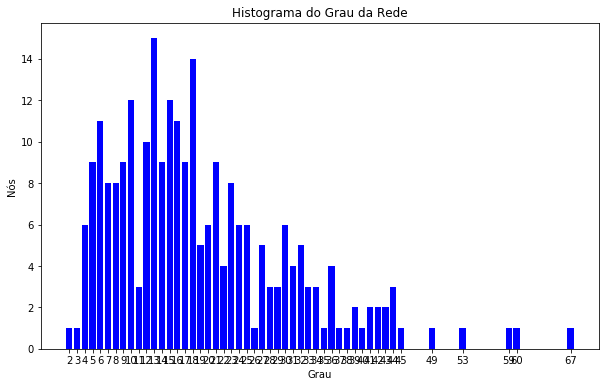

In [32]:
InformacoesRede(G)

In [39]:
deg, bet, clo, clu, bro, bri = ComputeCentralityMeasures(G, normalized=False)

WriteCentralityMeasures('PPI_NODES_TOP250.txt', list(G.nodes()),
                        deg, bet, clo, clu, bro, bri)

#!head -n 2 PPI_NODES_TOP250.txt

GENE	Degree	Betweenness	Closeness	Clustering	Brokering	Bridgeness
XRCC6	16.000000000000000	165.628937693270927	0.461111111111111	0.166666666666667	0.053547523427041	12.989921484907670


In [50]:
edges = list(G.edges())

with open('PPI_EDGES_TOP250.txt', 'w') as f:
    f.write('source\ttarget\tweight\n')
    for u,v in edges:
        weight = (deg[u]+deg[v])/2 # <-- mean
        f.write(u+'\t'+v+'\t'+str(weight)+'\nt')
        
#!head -n 2 PPI_EDGES_TOP250.txt

source	target	weight
XRCC6	VAV1	21.5


### Questão 2

2) A partir do Grafo G da questão anterior, obtenha um novo grafo R correspondente ao _**Rich Club**_ contendo os 20% dos nós de maior grau. Compare as medidas deste novo grafo:
* ordem de H
* tamanho de H
* diâmetro de H
* <b>densidade</b> da rede H
* grau médio de H
* Histograma de distribuição dos Graus de H
* calcule as seguintes medidas de centralidade dos vértices de H: <br>
    - Degre
    - Betweenness
    - Closeness
    - Clustering
    - Brokering
    - Bridgeness

In [100]:
# get list of top nodes
# sorted by degree centrality
aux, top = [], []
for key, value in G.degree:
    aux.append([key, value])
aux.sort(key=lambda x:x[1], reverse=True)
for key, value in aux:
    top.append(key)

Ordem: 50 
Tamanho: 452 
Diâmetro: 3 
Densidade: 0.3689795918367347 
Grau médio: 18.08


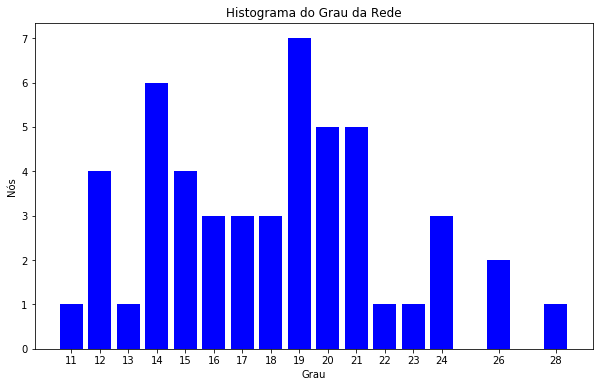

In [106]:
n = int((len(G.nodes())*20)/100)
R = G.subgraph(top[:n])
InformacoesRede(R)

# Cytoscape 

## Questão 3

3) Utilize os arquivos 'PPI_NODES_TOP250.txt' e 'PPI_EDGES_TOP250.txt' -- que contém o grafo G (com os TOP 250 nós de maior grau) -- como entrada para a ferramenta de visualização Cytoscape. Apresente uma visualização da rede com as seguintes informações:
  * NÓ: exiba o tamanho dos nós (tamanho do objeto, fonte) proporcional ao grau do nó.
  * NÓ: exiba a cor do nó em função do Betweenness (espectro variando entre maior valor==>'vermelho' e menor valor==>'verde').
  * NÓ: exiba o shape (formato) do nó dos TOP 25 como 'Diamond'.
  
  * ARESTA: exiba as arestas com espessura proporcional ao seu valor 'weight'.
  